<a href="https://colab.research.google.com/github/Moksha-nagraj/Marvel_tasks_lvl2/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Anomaly Detection with Isolation Forest**<br>
Anomaly Detection is a technique used to identify rare events or observations that differ significantly from the majority of data points. This approach is crucial in various applications such as fraud detection, fault detection in machinery, and identifying cyber threats.

Implementation Steps
####**1. Load and Prepare Data:**<br>
In this example, we use the Iris dataset, which contains multiple features. The dataset is split into training and testing sets to evaluate the model effectively.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


####**2. Model Creation:**<br>
The Isolation Forest algorithm is initialized. The contamination parameter specifies the expected proportion of outliers in the dataset.

In [ ]:
from pyod.models.iforest import IForest

# Create an instance of the Isolation Forest model
clf = IForest(contamination=0.1, random_state=42)


####**3. Model Training:**<br>
The model is trained on the training data. Isolation Forest builds multiple decision trees to isolate instances, where anomalies are expected to be isolated more easily than normal observations.

In [ ]:
# Train the model on the training data
clf.fit(X_train)


IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=42,
    verbose=0)

####**4. Predict Anomaly Scores:**<br>
After training, the model is used to predict anomaly scores on the test dataset. Higher scores indicate a greater likelihood of an instance being an outlier.

In [ ]:
# Predict the anomaly scores on the test set
y_scores = clf.decision_function(X_test)


####**5. Identify Anomalies:**<br>
A threshold is established to classify instances as anomalies. Points with scores above this threshold are considered outliers.

In [ ]:
threshold = 0  # Adjust this threshold based on specific requirements
anomaly_points = X_test[y_scores > threshold]


####**6. Visualization:**
Finally, the results are visualized using a scatter plot. Normal points and detected outliers are plotted in different colors to clearly show the anomalies.

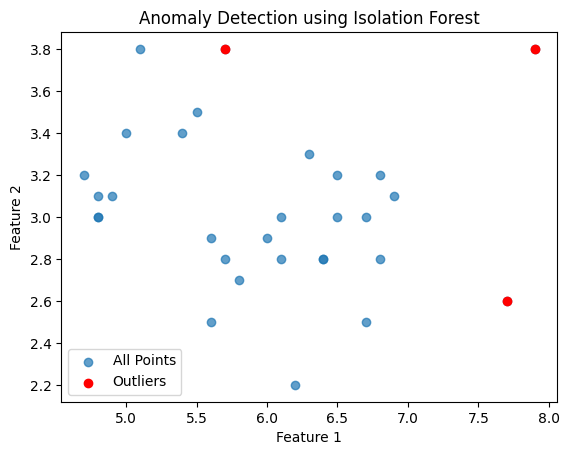

In [ ]:
# Plotting all points
plt.scatter(X_test[:, 0], X_test[:, 1], label='All Points', alpha=0.7)

# Plotting outliers in a different color
plt.scatter(anomaly_points[:, 0], anomaly_points[:, 1], label='Outliers', color='red')

plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
